In [1]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#drive.mount('/drive')
data = pd.read_csv('/content/CC GENERAL.csv')


# Droping rows with missing values
data.dropna(inplace=True)

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('CUST_ID', axis=1))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

principalData = pd.DataFrame(data = X_pca, columns = ['PCA 1', 'PCA 2'])
finalData = pd.concat([principalData, data[['TENURE']]], axis = 1)
finalData.head()



,PCA 1,PCA 2,TENURE
0,-1.696396,-1.122586,12.0
1,-1.215686,2.435625,12.0
2,0.935868,-0.385143,12.0
3,-1.614639,-0.724590,NaN
4,0.223709,-0.783576,12.0


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)

#Applying KMeans to the PCA result
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

silhouette_score(X_pca, y_kmeans)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.459732742649603

In [3]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('CUST_ID', axis=1))

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply k-means to PCA
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Evaluating the performance
silhouette_score(X_pca, y_kmeans)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4597328541728247

2nd Question

In [4]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler

#loading the dataset into dataframes
drive.mount('/drive')
dataSet = pd.read_csv('/content/pd_speech_features.csv')

#Separating the features(X) from target variable(y)
X = dataSet.iloc[:, 1:-1].values
y = dataSet.iloc[:, -1].values

# applying scaling to the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


Mounted at /drive


In [5]:
from sklearn.decomposition import PCA

# applying PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=3)
X = pca.fit_transform(X)
principalData = pd.DataFrame(data = X, columns = ['PCA 1', 'PCA 2', 'PCA 3'])

finalDf = pd.concat([principalData, dataSet[['class']]], axis = 1)
finalDf.head()

,PCA 1,PCA 2,PCA 3,class
0,-10.034309,1.473185,-6.836297,1
1,-10.624667,1.585846,-6.820881,1
2,-13.503155,-1.251541,-6.809194,1
3,-9.143503,8.834665,15.302887,1
4,-6.752753,4.612585,15.649156,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# splitting the training and testing sets using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# using SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# calculating the performance by calculating accuracy, precision, recall and f1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 score: ", f1)

Accuracy:  0.775330396475771
Precision:  0.7699530516431925
Recall:  0.9879518072289156
F1 score:  0.8654353562005278


3rd Question

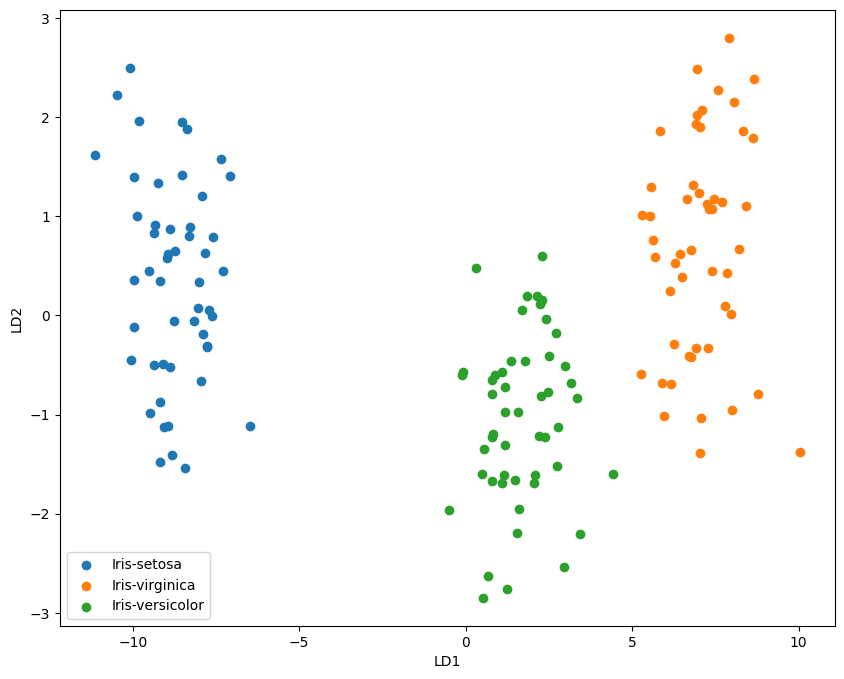

In [7]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# loading the iris dataset from CSV file
dataSet = pd.read_csv('/content/Iris.csv')

# separating the features and target variables
X = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, -1].values

# standardizing the features
sc = StandardScaler()
X = sc.fit_transform(X)

# applying LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)
import matplotlib.pyplot as plt

# visualizing the reduced-dimensional data
plt.figure(figsize=(10, 8))
for species in set(y):
    plt.scatter(X_lda[y == species, 0], X_lda[y == species, 1], label=species)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


4th Question

The aim of LDA and PCA is to maximize the variance in a lower dimension using linear transformations.

PCA is an unsupervised learning method that looks for a new set of orthogonal variables known as Principal components, that can best accommodate for the data's variation. The first principal component accounts for the majority of the variance in the data, and the principal components are arranged in order of their capacity to explain variance. PCA is frequently used for exploratory research and data visualization.

The LDA method is of supervised learning which looks for a linear combination of features that best distinguishes between the classes in the data. Maximizing the variance between classes while minimizing the variance within classes is the aim of LDA. LDA is frequently applied to classification issues, where the goal is to predict, from a new observation's features, what class it belongs to.

PCA is an unsupervised technique for reducing the dimensionality of the data by identifying the principal components that explain the most variance, whereas LDA is a supervised technique for reducing the dimensionality of the data by identifying the linear combination of features that best separates the classes in the data.